<a href="https://colab.research.google.com/github/Franulo/DeepLearningJourney/blob/main/01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt # for Diagramms

In [3]:
tensor = tf.constant([1, 2, 3])
print(tf.__version__)
tensor.shape

2.12.0


TensorShape([3])

# Neural Network Regression with TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it to be: predicting a number.

## Creating data to view and fit

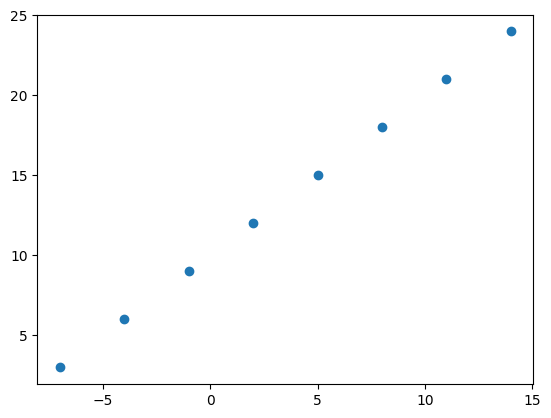

In [4]:
# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y)

In [5]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [6]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info.shape, house_price.shape

(TensorShape([3]), TensorShape([1]))

In [7]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [8]:
# Turn our NumPy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [9]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

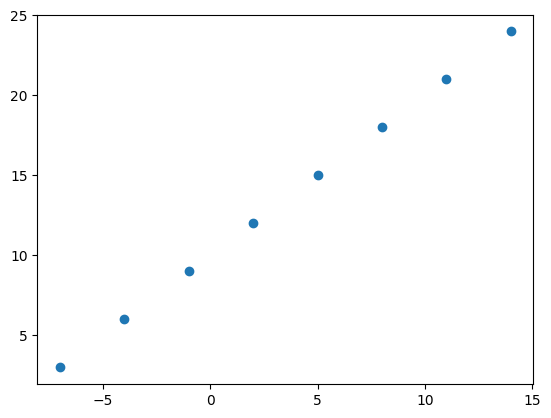

In [10]:
plt.scatter(X, y)

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compiling a  model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns its learning) and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels)

In [11]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=200)


Epoch 1/200
1/1 [==============================] - 1s 562ms/step - loss: 21.9099 - mae: 21.9099
Epoch 2/200
1/1 [==============================] - 0s 8ms/step - loss: 21.5168 - mae: 21.5168
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 21.1237 - mae: 21.1237
Epoch 4/200
1/1 [==============================] - 0s 12ms/step - loss: 20.7305 - mae: 20.7305
Epoch 5/200
1/1 [==============================] - 0s 10ms/step - loss: 20.3768 - mae: 20.3768
Epoch 6/200
1/1 [==============================] - 0s 11ms/step - loss: 20.0956 - mae: 20.0956
Epoch 7/200
1/1 [==============================] - 0s 9ms/step - loss: 19.8143 - mae: 19.8143
Epoch 8/200
1/1 [==============================] - 0s 9ms/step - loss: 19.5331 - mae: 19.5331
Epoch 9/200
1/1 [==============================] - 0s 8ms/step - loss: 19.2518 - mae: 19.2518
Epoch 10/200
1/1 [==============================] - 0s 9ms/step - loss: 18.9706 - mae: 18.9706
Epoch 11/200
1/1 [==============================] - 0s

In [12]:
model1 = tf.keras.Sequential()
model1.add(tf.keras.layers.Dense(1))

model1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=["mae"])

model1.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 616ms/step - loss: 12.4524 - mae: 12.4524
Epoch 2/100
1/1 [==============================] - 0s 15ms/step - loss: 12.3199 - mae: 12.3199
Epoch 3/100
1/1 [==============================] - 0s 18ms/step - loss: 12.1874 - mae: 12.1874
Epoch 4/100
1/1 [==============================] - 0s 24ms/step - loss: 12.0549 - mae: 12.0549
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 11.9224 - mae: 11.9224
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 11.7899 - mae: 11.7899
Epoch 7/100
1/1 [==============================] - 0s 10ms/step - loss: 11.6574 - mae: 11.6574
Epoch 8/100
1/1 [==============================] - 0s 11ms/step - loss: 11.5249 - mae: 11.5249
Epoch 9/100
1/1 [==============================] - 0s 10ms/step - loss: 11.3924 - mae: 11.3924
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 11.2599 - mae: 11.2599
Epoch 11/100
1/1 [==============================]

In [13]:
model.predict([11.0]), model1.predict([11.0])

1/1 [==============================] - 0s 204ms/step


(array([[20.08104]], dtype=float32), array([[19.542463]], dtype=float32))

In [14]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

In [15]:
model.predict([17.0])

1/1 [==============================] - 0s 120ms/step


array([[30.142513]], dtype=float32)

## Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more layers,
increase the number of hidden units (all called neurons)
within each of the hidden layers, change the activation function of each layer.
2. **Compiling a model** - here we might change the optimization function or perhaps the learning rate of the optimization function.
3. **Fitting a model** - here we might fit a model for more epochs (leave it training for longer) or on more data (give the model more examples to learn form).

In [16]:
# Let's rebuild our model

# 1. Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 1s/step - loss: 13.9819 - mae: 13.9819
Epoch 2/100
1/1 [==============================] - 0s 17ms/step - loss: 13.8811 - mae: 13.8811
Epoch 3/100
1/1 [==============================] - 0s 17ms/step - loss: 13.7804 - mae: 13.7804
Epoch 4/100
1/1 [==============================] - 0s 12ms/step - loss: 13.6798 - mae: 13.6798
Epoch 5/100
1/1 [==============================] - 0s 14ms/step - loss: 13.5792 - mae: 13.5792
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 13.4786 - mae: 13.4786
Epoch 7/100
1/1 [==============================] - 0s 16ms/step - loss: 13.3780 - mae: 13.3780
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 13.2775 - mae: 13.2775
Epoch 9/100
1/1 [==============================] - 0s 16ms/step - loss: 13.1770 - mae: 13.1770
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 13.0764 - mae: 13.0764
Epoch 11/100
1/1 [==============================] -

In [17]:
model.predict([14])

1/1 [==============================] - 0s 153ms/step


array([[25.062443]], dtype=float32)

In [18]:
X.numpy(), y.numpy()

(array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32),
 array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32))

## Evaluting a model

In practice, a typical workflow you'll go though when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak...
```

When it comes to evaluation... there are 3 words you should memorize:
> "Visualize, Visualize, Visualize"

It's a good idea to visualize:
* The data - what data are we working with? What does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the orginal labels)?

In [19]:
# Make a bigger dataset
x = tf.range(-100, 100, 4)
x.numpy()

array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)

In [20]:
# Make labels for the dataset
y = x + 10
y.numpy()

array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)

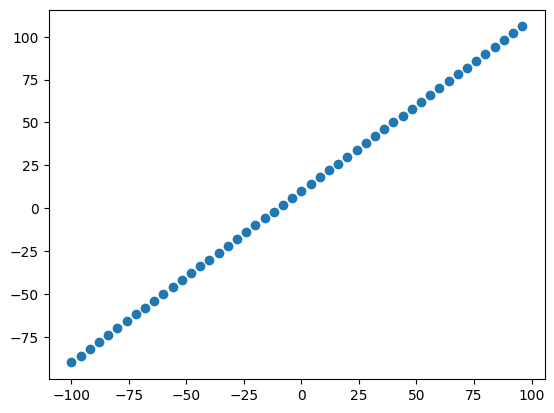

In [21]:
# Visualize the data
import matplotlib.pyplot as plt

plt.scatter(x, y)

### The 3 sets...

* Training set - the model learns from this data, which is typically 70-80% of the total data you have available.
* Validation set - model gets tuned on this data, which is typically 10-15% of the data available.
* Test set - the model gets evaluated on this data to test what it has learnend, this set is typically 10-15% of the total data available.

In [22]:
# Check the length of how many samples we have
len(x), len(y)

(50, 50)

In [23]:
# Split the data into train and test sets
x_train = x[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

x_test = x[40:]
y_test = y[40:]

len(x_train), len(y_train), len(x_test), len(y_test)

(40, 40, 10, 10)

### Visualizing the data
Now we've got our data in training and test sets... let's visulizee it again!


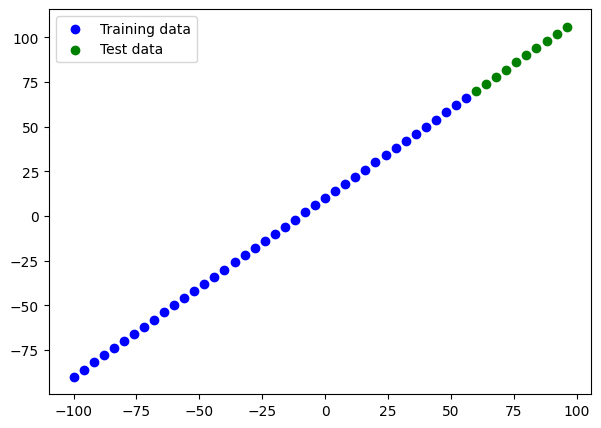

In [24]:
plt.figure(figsize=(7, 5))
# Plot training data in blue
plt.scatter(x_train, y_train, c="b", label="Training data") # our model will learn on this
# Plot test data in green
plt.scatter(x_test, y_test, c="g", label="Test data") # want our model to be able to predict this (given x what's y?)
# Show a legend
plt.legend()

In [48]:
# Let's have a look at how to build a neural network for our data
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1], name="layer1")
], name="model")

model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

### Visualizing the model

In [49]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable parameters - these are the parameters (patterns) the model can update as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**).

In [51]:
# Let's fit or model to the training data
model.fit(x_train, y_train, epochs=100, verbose=0)

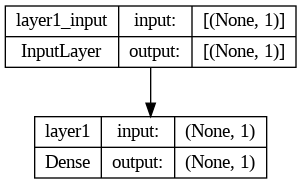

In [50]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. Often